# Analise dos resultados das normalizações

## Plot sem calcular a mediana dos valores

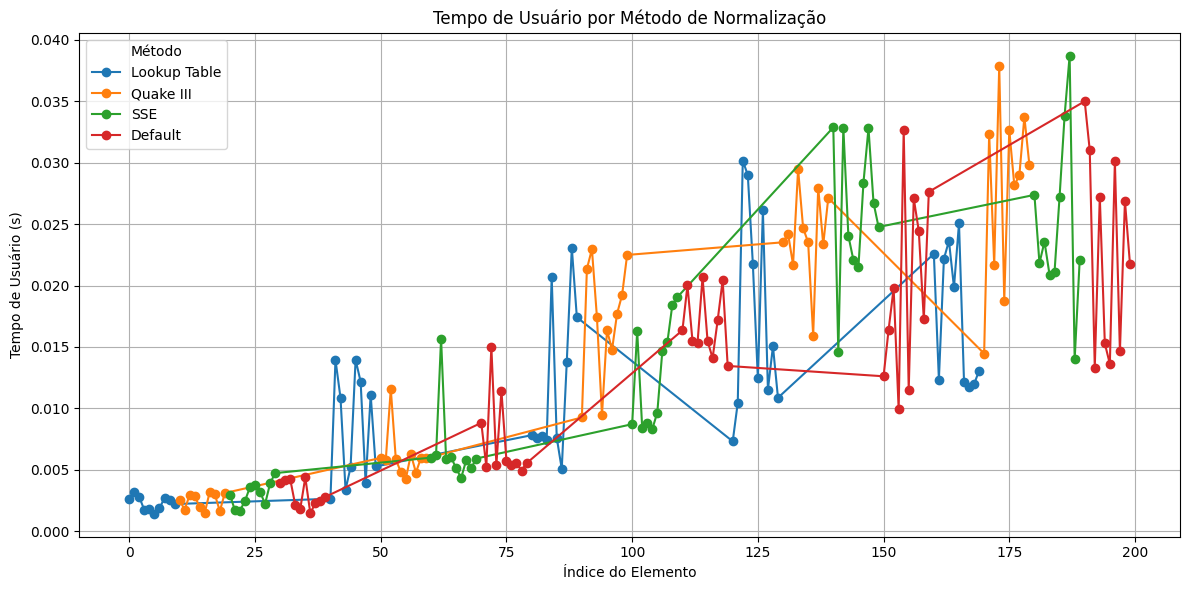

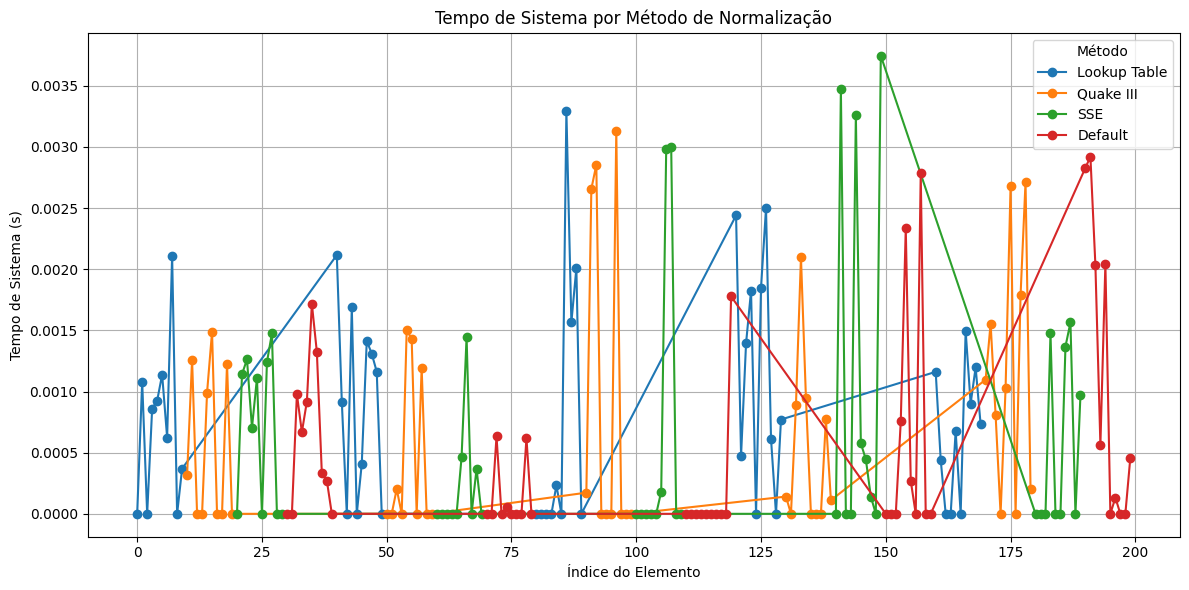

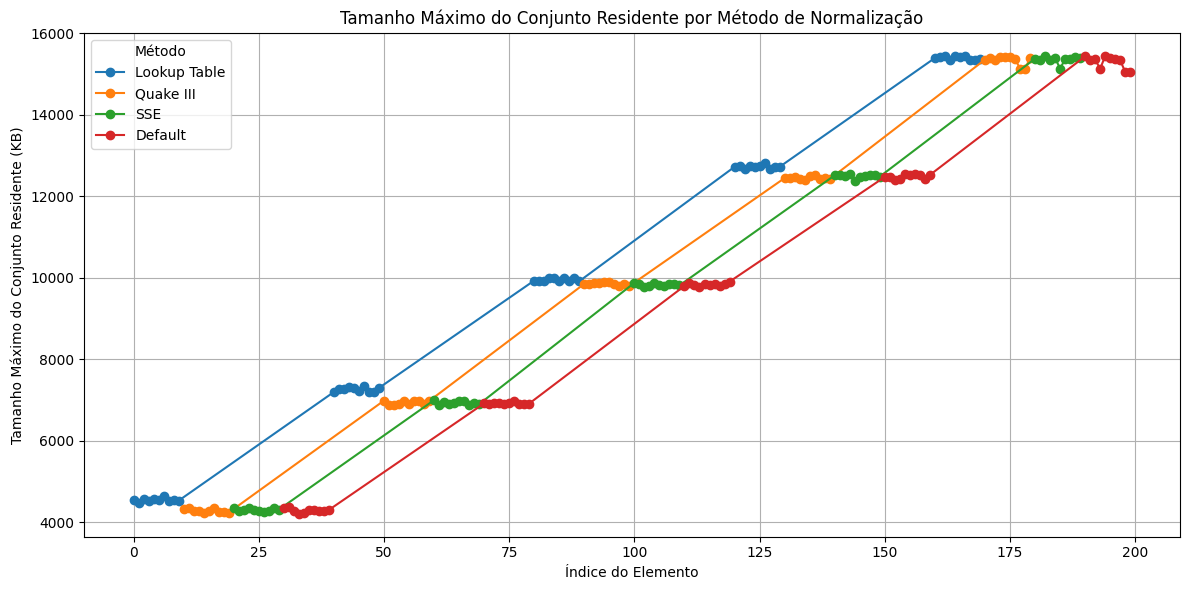

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados CSV (com 4 colunas)
df = pd.read_csv('benchmark_results.csv', header=None)
df.columns = ['Method', 'UserTime', 'SystemTime', 'MaxResidentSetSize']

# Preparar o gráfico de Tempo de Usuário
plt.figure(figsize=(12, 6))
for method in df['Method'].unique():
    method_data = df[df['Method'] == method]
    plt.plot(method_data.index, method_data['UserTime'], marker='o', label=method)
plt.xlabel('Índice do Elemento')
plt.ylabel('Tempo de Usuário (s)')
plt.title('Tempo de Usuário por Método de Normalização')
plt.legend(title='Método')
plt.grid(True)
plt.tight_layout()
plt.show()

# Preparar o gráfico de Tempo de Sistema
plt.figure(figsize=(12, 6))
for method in df['Method'].unique():
    method_data = df[df['Method'] == method]
    plt.plot(method_data.index, method_data['SystemTime'], marker='o', label=method)
plt.xlabel('Índice do Elemento')
plt.ylabel('Tempo de Sistema (s)')
plt.title('Tempo de Sistema por Método de Normalização')
plt.legend(title='Método')
plt.grid(True)
plt.tight_layout()
plt.show()

# Preparar o gráfico de Tamanho Máximo do Conjunto Residente
plt.figure(figsize=(12, 6))
for method in df['Method'].unique():
    method_data = df[df['Method'] == method]
    plt.plot(method_data.index, method_data['MaxResidentSetSize'], marker='o', label=method)
plt.xlabel('Índice do Elemento')
plt.ylabel('Tamanho Máximo do Conjunto Residente (KB)')
plt.title('Tamanho Máximo do Conjunto Residente por Método de Normalização')
plt.legend(title='Método')
plt.grid(True)
plt.tight_layout()
plt.show()


## Plot com a média dos valores calculada

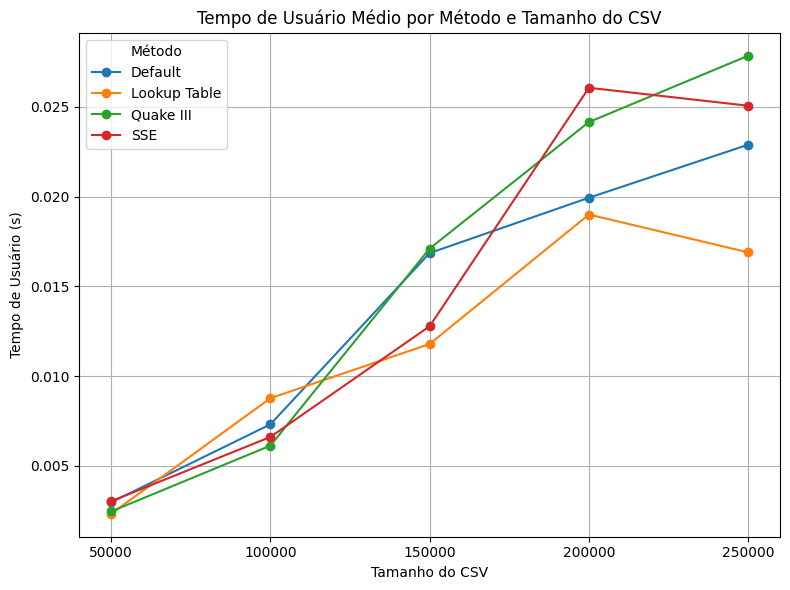

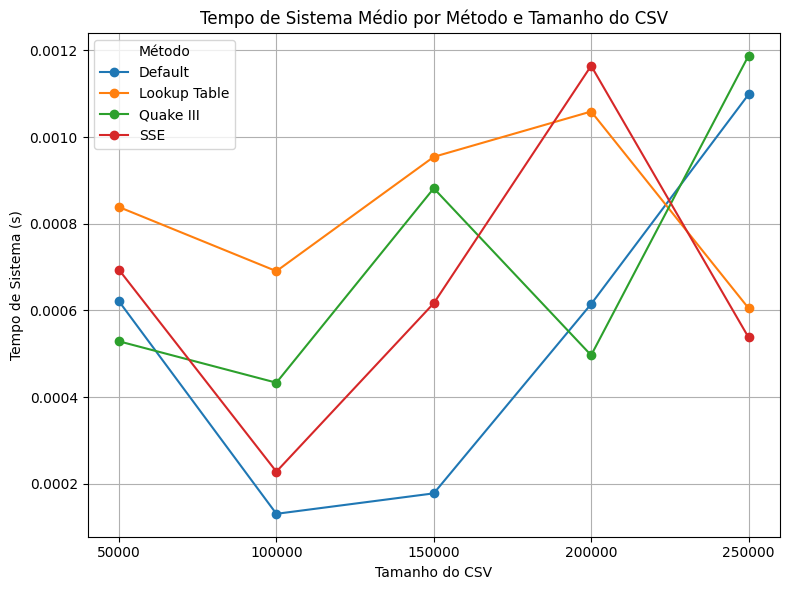

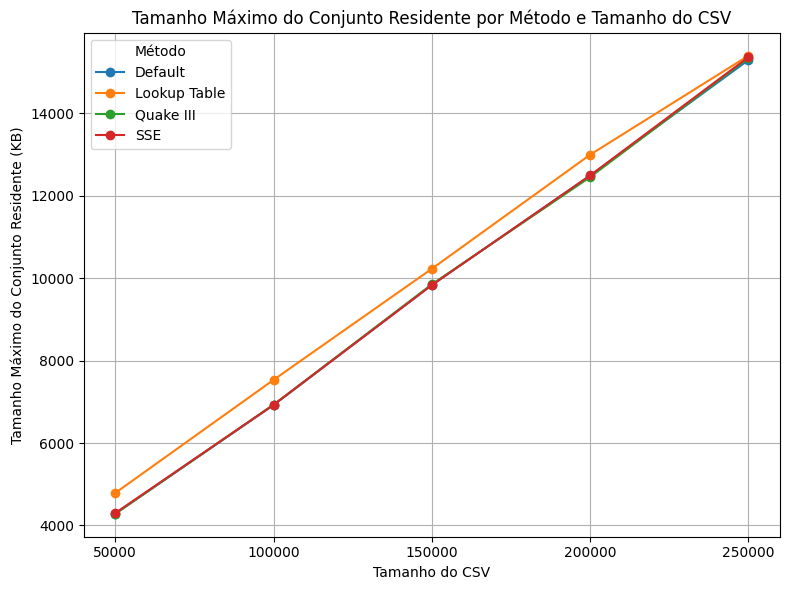

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('benchmark_results.csv', header=None)

# Adicionar a coluna de tamanho do CSV
csv_sizes = []
default_size = 1000
for i in range(len(df)):
    if i <= 40:
        csv_sizes.append(default_size * 50)
    elif i <= 80:
        csv_sizes.append(default_size * 100)
    elif i <= 120:
        csv_sizes.append(default_size * 150)
    elif i <= 160:
        csv_sizes.append(default_size * 200)
    else:
        csv_sizes.append(default_size * 250)

df['CSVSize'] = csv_sizes

# Agrupar por método e tamanho do CSV, e calcular a média dos tempos e do uso de recursos
avg_df = df.groupby([0, 'CSVSize']).mean().reset_index()

# Definir os tamanhos de CSV para o eixo X
x_labels = [50_000, 100_000, 150_000, 200_000, 250_000]
x_positions = np.arange(len(x_labels))

# Preparar os dados para os gráficos
methods = avg_df[0].unique()
avg_data = {method: avg_df[avg_df[0] == method].set_index('CSVSize').reindex(x_labels, fill_value=np.nan) for method in methods}

# PLOT 1: Tempo de Usuário Médio (Sem Escala Logarítmica)
plt.figure(figsize=(8, 6))
for method in methods:
    plt.plot(x_positions, avg_data[method][1], marker='o', label=method)
plt.xticks(x_positions, x_labels)
plt.xlabel('Tamanho do CSV')
plt.ylabel('Tempo de Usuário (s)')
plt.title('Tempo de Usuário Médio por Método e Tamanho do CSV')
plt.legend(title='Método')
plt.grid(True)
plt.tight_layout()
plt.show()

# PLOT 2: Tempo de Sistema Médio (Sem Escala Logarítmica)
plt.figure(figsize=(8, 6))
for method in methods:
    plt.plot(x_positions, avg_data[method][2], marker='o', label=method)
plt.xticks(x_positions, x_labels)
plt.xlabel('Tamanho do CSV')
plt.ylabel('Tempo de Sistema (s)')
plt.title('Tempo de Sistema Médio por Método e Tamanho do CSV')
plt.legend(title='Método')
plt.grid(True)
plt.tight_layout()
plt.show()

# PLOT 3: Tamanho Máximo do Conjunto Residente (Sem Escala Logarítmica)
plt.figure(figsize=(8, 6))
for idx, method in enumerate(methods):
    plt.plot(x_positions, avg_data[method][3], marker='o', label=method)

plt.xticks(x_positions, x_labels)
plt.xlabel('Tamanho do CSV')
plt.ylabel('Tamanho Máximo do Conjunto Residente (KB)')
plt.title('Tamanho Máximo do Conjunto Residente por Método e Tamanho do CSV')
plt.legend(title='Método')
plt.grid(True)
plt.tight_layout()
plt.show()

